<a href="https://colab.research.google.com/github/mnfibin/AI-ML-Internship-Elevate_Labs/blob/main/Task%201/Data%20Cleaning%20%26%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC DATASET: DATA CLEANING & PREPROCESSING PIPELINE**
---
*   ### **Author:** FIBIN MN
*   ### **Objective:** Clean and prepare raw data for Machine Learning
*   ### **Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn



> # ***STEP 1: IMPORT LIBRARIES***



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 70)
print("TITANIC DATASET: DATA CLEANING & PREPROCESSING")
print("=" * 70)

TITANIC DATASET: DATA CLEANING & PREPROCESSING


> # ***STEP 2: LOAD AND EXPLORE THE DATASET***

In [4]:
print("\n[STEP 1] Loading Dataset...")
print("-" * 70)

# Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 Rows:")
print(df.head())

print("\n\n[STEP 2] Basic Dataset Information")
print("-" * 70)
print("\nDataset Info:")
print(df.info())

print("\n\nBasic Statistics:")
print(df.describe())

print("\n\nColumn Data Types:")
print(df.dtypes)


[STEP 1] Loading Dataset...
----------------------------------------------------------------------
Dataset Shape: 891 rows × 12 columns

First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0 

> # ***STEP 3: IDENTIFY AND ANALYZE MISSING VALUES***



[STEP 3] Missing Values Analysis
----------------------------------------------------------------------

Columns with Missing Values:
  Column  Missing_Count  Percentage
   Cabin            687   77.104377
     Age            177   19.865320
Embarked              2    0.224467


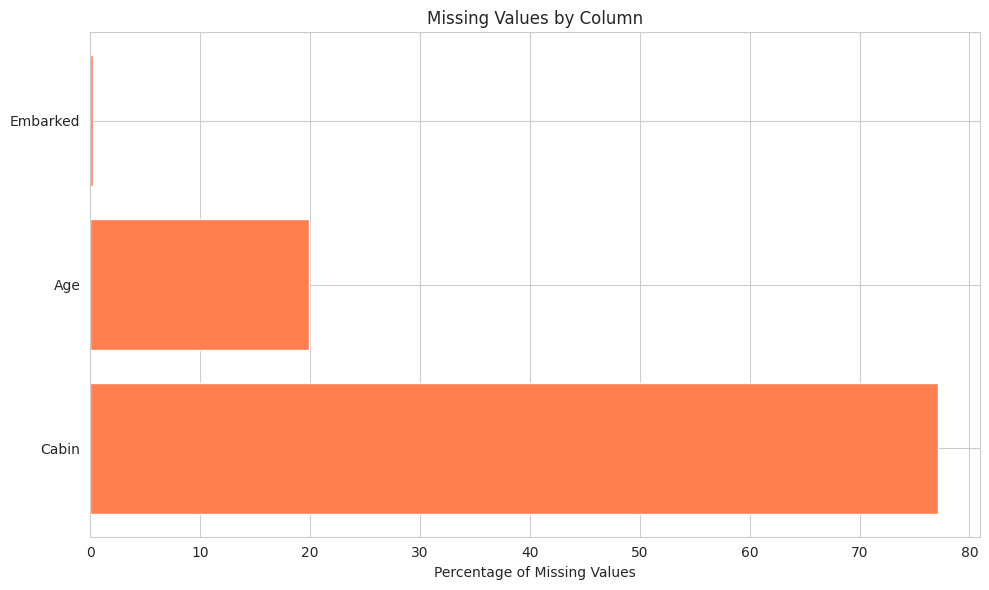

In [5]:
print("\n\n[STEP 3] Missing Values Analysis")
print("-" * 70)

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nColumns with Missing Values:")
print(missing_df.to_string(index=False))

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_df_plot = missing_df[missing_df['Missing_Count'] > 0]
plt.barh(missing_df_plot['Column'], missing_df_plot['Percentage'], color='coral')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Values by Column')
plt.tight_layout()
plt.show()


> # ***STEP 4: HANDLE MISSING VALUES***

In [6]:
print("\n\n[STEP 4] Handling Missing Values")
print("-" * 70)

# Create a copy for processing
df_cleaned = df.copy()

# 4.1 Handle Age: Fill with median (robust to outliers)
age_median = df_cleaned['Age'].median()
df_cleaned['Age'].fillna(age_median, inplace=True)
print(f"✓ Age: Filled {df['Age'].isnull().sum()} missing values with median = {age_median:.2f}")

# 4.2 Handle Embarked: Fill with mode (most common port)
embarked_mode = df_cleaned['Embarked'].mode()[0]
df_cleaned['Embarked'].fillna(embarked_mode, inplace=True)
print(f"✓ Embarked: Filled {df['Embarked'].isnull().sum()} missing values with mode = '{embarked_mode}'")

# 4.3 Handle Cabin: Too many missing values, create binary feature instead
df_cleaned['Has_Cabin'] = df_cleaned['Cabin'].notna().astype(int)
print(f"✓ Cabin: Created binary feature 'Has_Cabin' (1 if cabin known, 0 otherwise)")

# 4.4 Handle Fare: Fill with median
fare_median = df_cleaned['Fare'].median()
df_cleaned['Fare'].fillna(fare_median, inplace=True)
print(f"✓ Fare: Filled {df['Fare'].isnull().sum()} missing values with median = {fare_median:.2f}")

print(f"\nMissing values after cleaning: {df_cleaned.isnull().sum().sum()}")




[STEP 4] Handling Missing Values
----------------------------------------------------------------------
✓ Age: Filled 177 missing values with median = 28.00
✓ Embarked: Filled 2 missing values with mode = 'S'
✓ Cabin: Created binary feature 'Has_Cabin' (1 if cabin known, 0 otherwise)
✓ Fare: Filled 0 missing values with median = 14.45

Missing values after cleaning: 687


> # ***STEP 5: FEATURE ENGINEERING***

In [7]:
print("\n\n[STEP 5] Feature Engineering")
print("-" * 70)

# 5.1 Create Family Size feature
df_cleaned['FamilySize'] = df_cleaned['SibSp'] + df_cleaned['Parch'] + 1
print(f"✓ Created 'FamilySize' = SibSp + Parch + 1")

# 5.2 Create Is Alone feature
df_cleaned['IsAlone'] = (df_cleaned['FamilySize'] == 1).astype(int)
print(f"✓ Created 'IsAlone' binary feature")

# 5.3 Extract Title from Name
df_cleaned['Title'] = df_cleaned['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(f"✓ Extracted 'Title' from Name column")
print(f"  Unique titles: {df_cleaned['Title'].nunique()} - {df_cleaned['Title'].unique()[:10]}")

# Simplify rare titles
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare', 'Mlle': 'Miss',
    'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare', 'Jonkheer': 'Rare',
    'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs', 'Capt': 'Rare', 'Sir': 'Rare'
}
df_cleaned['Title'] = df_cleaned['Title'].map(title_mapping)
df_cleaned['Title'].fillna('Rare', inplace=True)
print(f"  Simplified to: {df_cleaned['Title'].unique()}")




[STEP 5] Feature Engineering
----------------------------------------------------------------------
✓ Created 'FamilySize' = SibSp + Parch + 1
✓ Created 'IsAlone' binary feature
✓ Extracted 'Title' from Name column
  Unique titles: 17 - ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major']
  Simplified to: ['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


> # ***STEP 6: ENCODE CATEGORICAL VARIABLES***

In [8]:
print("\n\n[STEP 6] Encoding Categorical Variables")
print("-" * 70)

# Select features for modeling (drop unnecessary columns)
features_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_model = df_cleaned.drop(columns=features_to_drop)

# 6.1 Label Encoding for binary/ordinal features
label_encoders = {}
binary_features = ['Sex', 'Embarked', 'Title']

for feature in binary_features:
    le = LabelEncoder()
    df_model[feature] = le.fit_transform(df_model[feature])
    label_encoders[feature] = le
    print(f"✓ Encoded '{feature}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nCategorical encoding completed!")



[STEP 6] Encoding Categorical Variables
----------------------------------------------------------------------
✓ Encoded 'Sex': {'female': np.int64(0), 'male': np.int64(1)}
✓ Encoded 'Embarked': {'C': np.int64(0), 'Q': np.int64(1), 'S': np.int64(2)}
✓ Encoded 'Title': {'Master': np.int64(0), 'Miss': np.int64(1), 'Mr': np.int64(2), 'Mrs': np.int64(3), 'Rare': np.int64(4)}

Categorical encoding completed!


> # ***STEP 7: DETECT AND VISUALIZE OUTLIERS***



[STEP 7] Outlier Detection and Visualization
----------------------------------------------------------------------


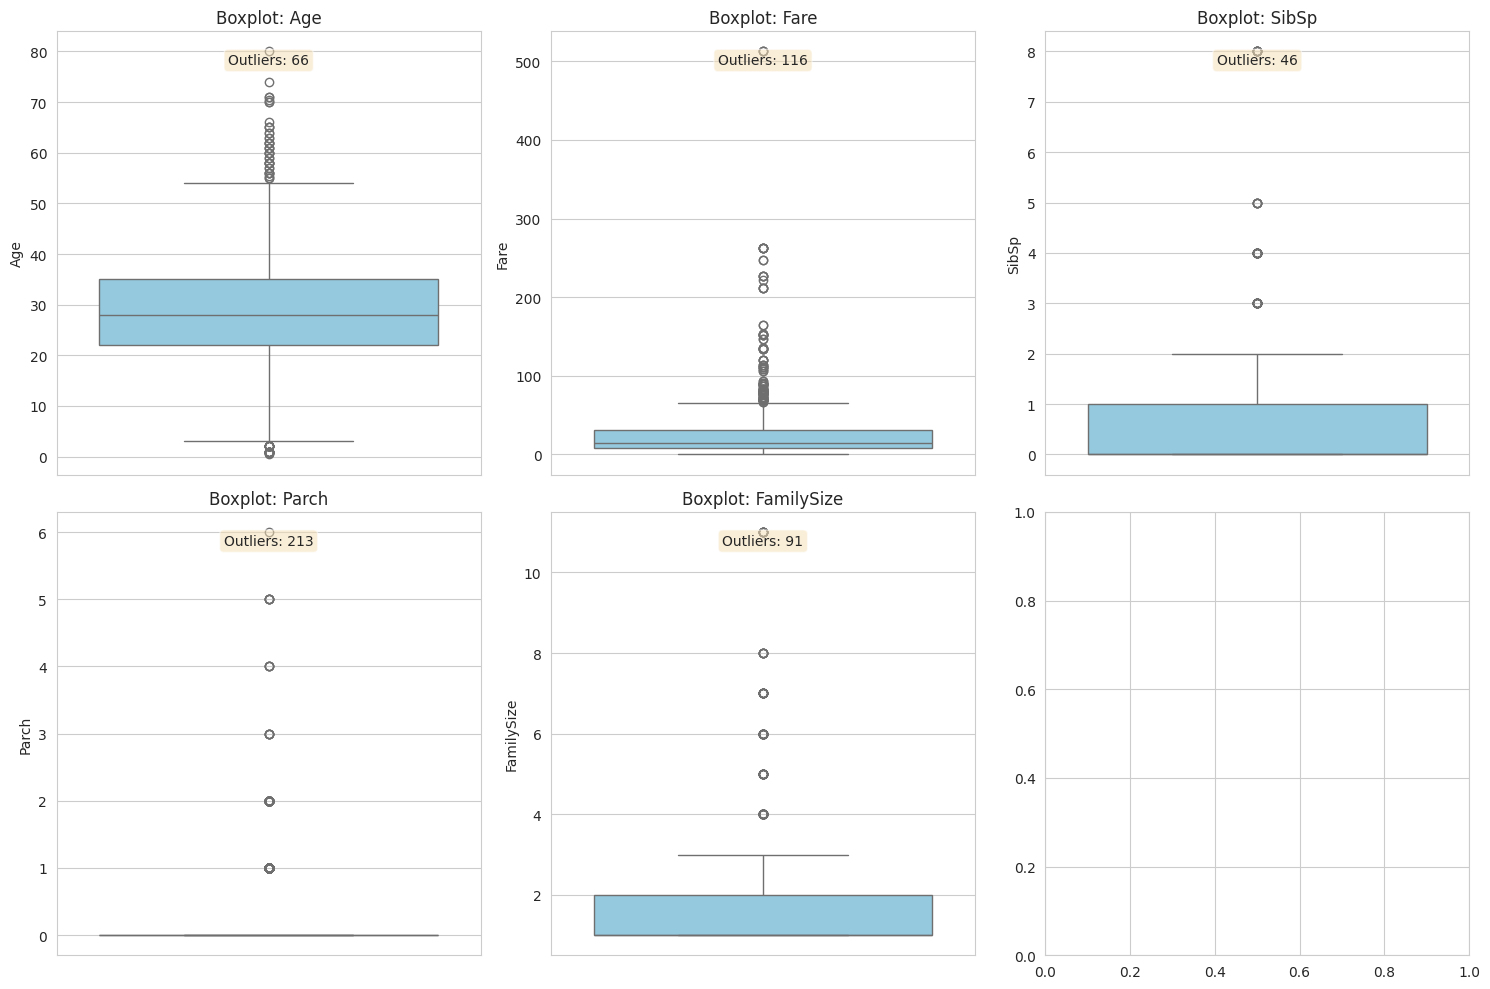

In [9]:
print("\n\n[STEP 7] Outlier Detection and Visualization")
print("-" * 70)

# Select numerical features for outlier detection
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

# Visualize outliers using boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=df_model, y=feature, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Boxplot: {feature}')
    axes[idx].set_ylabel(feature)

    # Calculate outliers using IQR method
    Q1 = df_model[feature].quantile(0.25)
    Q3 = df_model[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_model[(df_model[feature] < lower_bound) | (df_model[feature] > upper_bound)]

    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)}',
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

> # ***STEP 8: REMOVE OUTLIERS***

In [10]:
print("\n\n[STEP 8] Removing Outliers")
print("-" * 70)

df_no_outliers = df_model.copy()
initial_rows = len(df_no_outliers)

# Remove outliers using IQR method for Fare (most significant)
Q1 = df_no_outliers['Fare'].quantile(0.25)
Q3 = df_no_outliers['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers['Fare'] >= lower_bound) &
                                 (df_no_outliers['Fare'] <= upper_bound)]

print(f"✓ Removed {initial_rows - len(df_no_outliers)} outliers from 'Fare'")
print(f"  Dataset shape: {initial_rows} → {len(df_no_outliers)} rows")




[STEP 8] Removing Outliers
----------------------------------------------------------------------
✓ Removed 116 outliers from 'Fare'
  Dataset shape: 891 → 775 rows


># ***STEP 9: FEATURE SCALING (NORMALIZATION/STANDARDIZATION)***

In [11]:
print("\n\n[STEP 9] Feature Scaling")
print("-" * 70)

# Separate features and target
X = df_no_outliers.drop('Survived', axis=1)
y = df_no_outliers['Survived']

# Standardization using StandardScaler (mean=0, std=1)
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("✓ Applied StandardScaler to numerical features:")
print(f"  Features scaled: {numerical_cols}")
print("\nScaling Statistics:")
for col in numerical_cols:
    print(f"  {col:12s} - Mean: {X_scaled[col].mean():7.4f}, Std: {X_scaled[col].std():7.4f}")



[STEP 9] Feature Scaling
----------------------------------------------------------------------
✓ Applied StandardScaler to numerical features:
  Features scaled: ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

Scaling Statistics:
  Age          - Mean: -0.0000, Std:  1.0006
  Fare         - Mean:  0.0000, Std:  1.0006
  SibSp        - Mean: -0.0000, Std:  1.0006
  Parch        - Mean:  0.0000, Std:  1.0006
  FamilySize   - Mean: -0.0000, Std:  1.0006


> # ***STEP 10: FINAL DATA SUMMARY***

In [12]:
print("\n\n[STEP 10] Final Preprocessed Data Summary")
print("=" * 70)

print(f"\nFinal Dataset Shape: {X_scaled.shape[0]} rows × {X_scaled.shape[1]} features")
print(f"Target Variable: Survived ({y.value_counts()[1]} survived, {y.value_counts()[0]} did not survive)")

print("\n\nFeature List:")
for i, col in enumerate(X_scaled.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n\nFirst 5 Rows of Preprocessed Data:")
print(X_scaled.head())

print("\n\nPreprocessed Data Statistics:")
print(X_scaled.describe())



[STEP 10] Final Preprocessed Data Summary

Final Dataset Shape: 775 rows × 11 features
Target Variable: Survived (263 survived, 512 did not survive)


Feature List:
   1. Pclass
   2. Sex
   3. Age
   4. SibSp
   5. Parch
   6. Fare
   7. Embarked
   8. Has_Cabin
   9. FamilySize
  10. IsAlone
  11. Title


First 5 Rows of Preprocessed Data:
   Pclass  Sex       Age     SibSp     Parch      Fare  Embarked  Has_Cabin  \
0       3    1 -0.528321  0.625606 -0.433718 -0.779117         2          0   
2       3    0 -0.215182 -0.486423 -0.433718 -0.729373         2          0   
3       1    0  0.489381  0.625606 -0.433718  2.599828         2          1   
4       3    1  0.489381 -0.486423 -0.433718 -0.720161         2          0   
5       3    1 -0.058613 -0.486423 -0.433718 -0.690071         1          0   

   FamilySize  IsAlone  Title  
0    0.156739        0      2  
2   -0.549497        1      1  
3    0.156739        0      3  
4   -0.549497        1      2  
5   -0.549497      

> # ***STEP 11: CORRELATION ANALYSIS***



[STEP 11] Correlation Analysis
----------------------------------------------------------------------


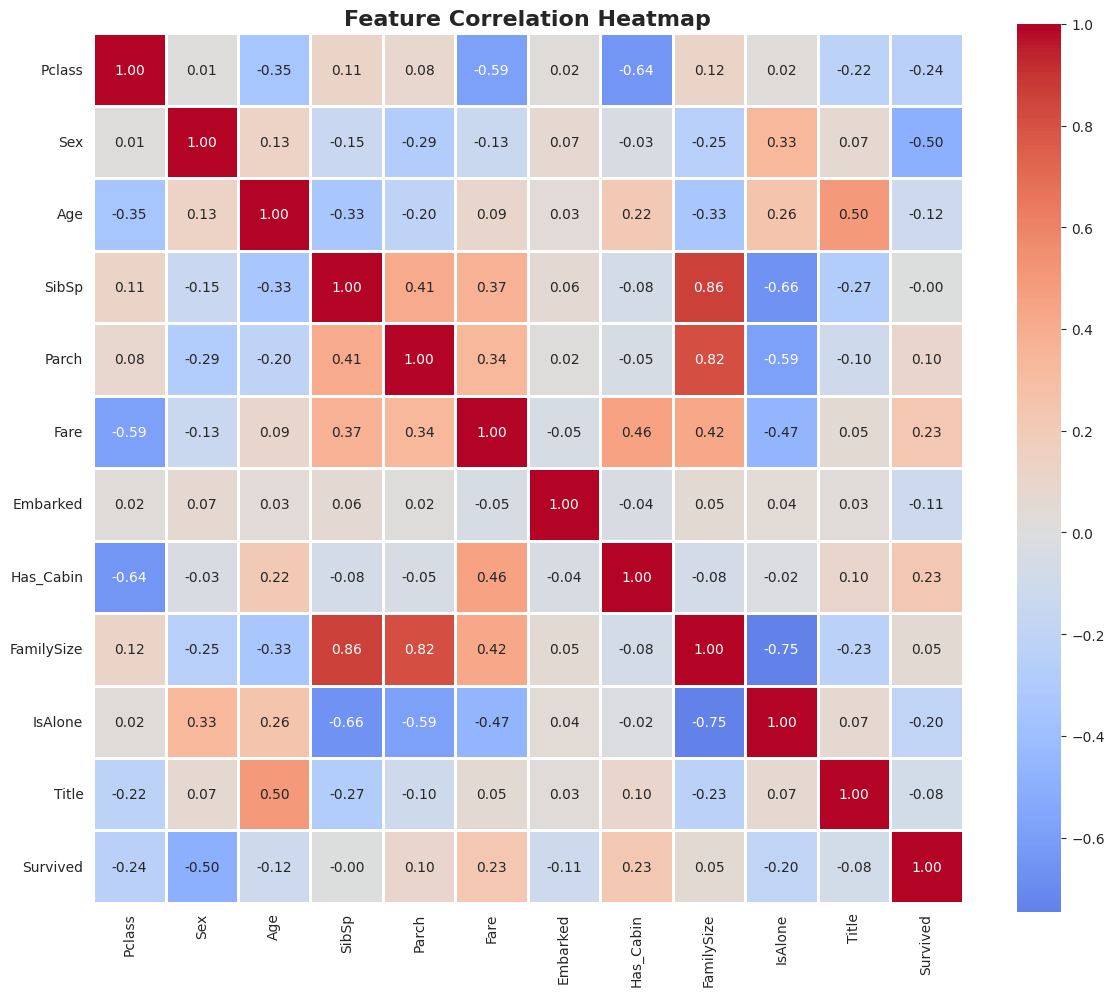


Top 5 Features Correlated with Survival:
  Fare           :  0.234
  Has_Cabin      :  0.226
  Parch          :  0.099
  FamilySize     :  0.053
  SibSp          : -0.003


In [13]:
print("\n\n[STEP 11] Correlation Analysis")
print("-" * 70)

# Create correlation matrix
correlation_data = X_scaled.copy()
correlation_data['Survived'] = y

plt.figure(figsize=(12, 10))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 5 Features Correlated with Survival:")
survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)[1:6]
for feature, corr in survival_corr.items():
    print(f"  {feature:15s}: {corr:6.3f}")

> # ***FINAL OUTPUT***

In [14]:
print("\n\n" + "=" * 70)
print("DATA PREPROCESSING COMPLETED SUCCESSFULLY!")
print("=" * 70)
print("\n✓ Dataset cleaned and ready for Machine Learning")
print("✓ All missing values handled")
print("✓ Categorical variables encoded")
print("✓ Outliers removed")
print("✓ Features scaled and normalized")
print("\nYou can now use X_scaled (features) and y (target) for ML modeling!")
print("=" * 70)



DATA PREPROCESSING COMPLETED SUCCESSFULLY!

✓ Dataset cleaned and ready for Machine Learning
✓ All missing values handled
✓ Categorical variables encoded
✓ Outliers removed
✓ Features scaled and normalized

You can now use X_scaled (features) and y (target) for ML modeling!
